In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-prediction-using-machine-learning/Training.csv
/kaggle/input/disease-prediction-using-machine-learning/Testing.csv


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
data_path = "/kaggle/input/disease-prediction-using-machine-learning/Training.csv"
df = pd.read_csv(data_path)
print(df.head(2))

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   

          prognosis  Unnamed: 133  
0  Fungal infection           NaN  
1  Fungal infection           NaN

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [5]:
disease_count = df['prognosis'].value_counts()
temp_df= pd.DataFrame({
    "Disease":disease_count.index,
    "Count":disease_count.values
})
print(temp_df.head())

               Disease  Count
0     Fungal infection    120
1          Hepatitis C    120
2          Hepatitis E    120
3  Alcoholic hepatitis    120
4         Tuberculosis    120


In [6]:
df.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [7]:
df.drop(columns = ['Unnamed: 133'],inplace = True)

In [24]:
import warnings

# Suppress Seaborn FutureWarning
warnings.filterwarnings("ignore", message=".*you will need to pass a length-1 tuple.*")

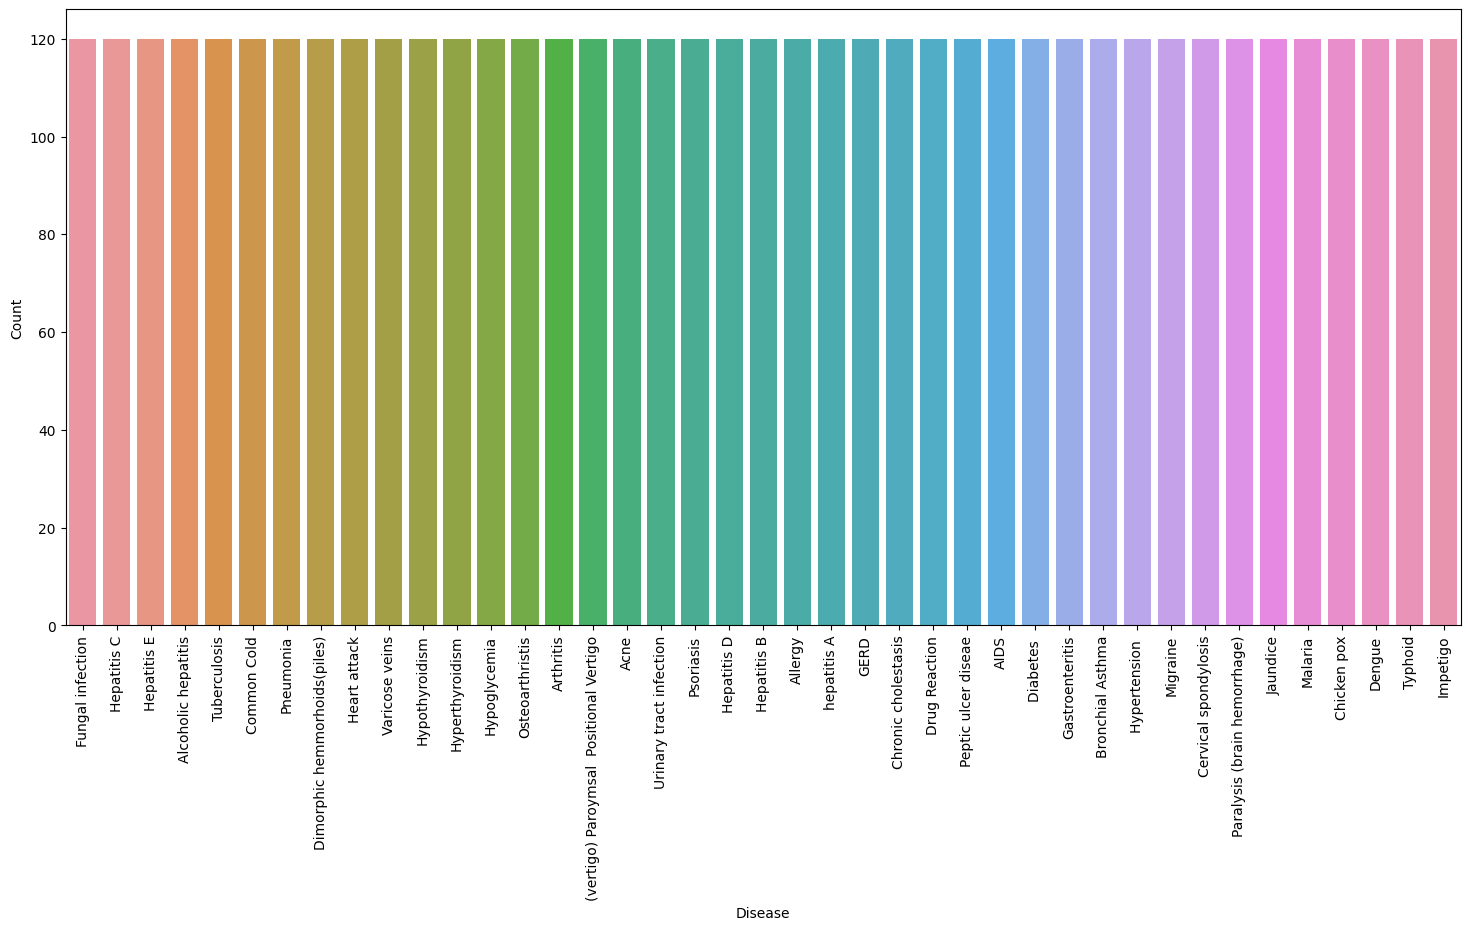

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,8))
sns.barplot(x='Disease', y = 'Count' , data=temp_df)
plt.xticks(rotation=90)
plt.show()


* **Heatmaps** :Shows how strongly different symptoms are correlated with each other (values from -1 to 1)
* **PCA** : Dimensionality reduction – simplifies many features (here 132 symptoms) into just 2 or 3 principal components that retain most of the variance (information) (Visualize how diseases cluster based on symptoms in 2D, even though your original data is high-dimensional).
* **Clustered Maps** : Groups similar symptoms (or patients) and plots their values (1 = present, 0 = not present) as a heatmap with dendrograms (trees).Find symptom clusters (e.g., fever + headache + body_pain) or check if certain patients have similar symptom profile


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


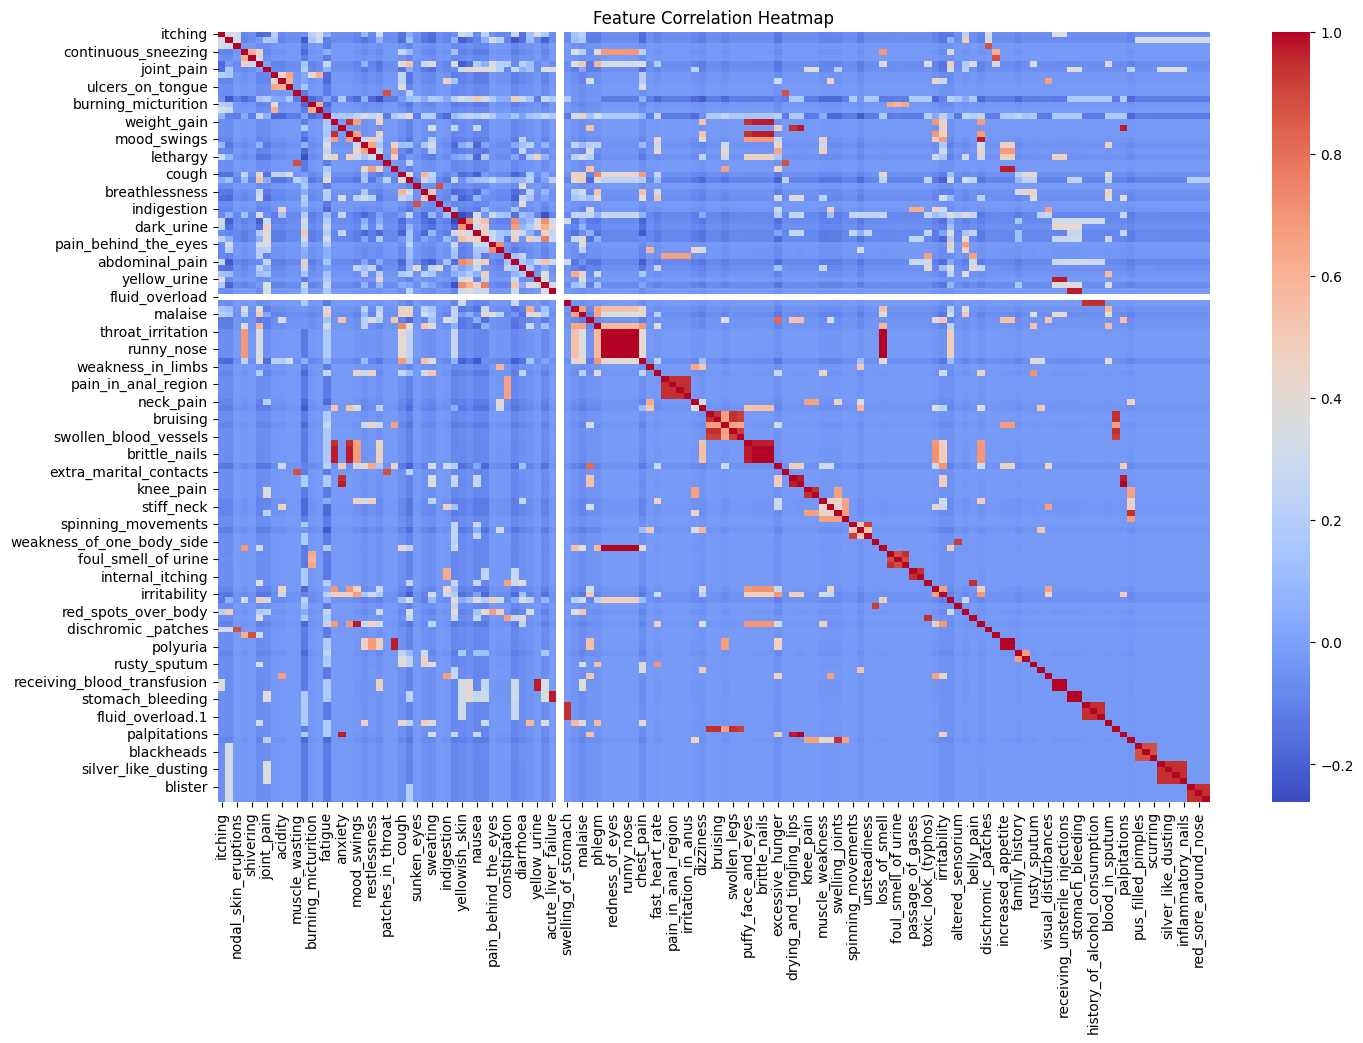

In [25]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.drop(['prognosis'], axis=1).corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


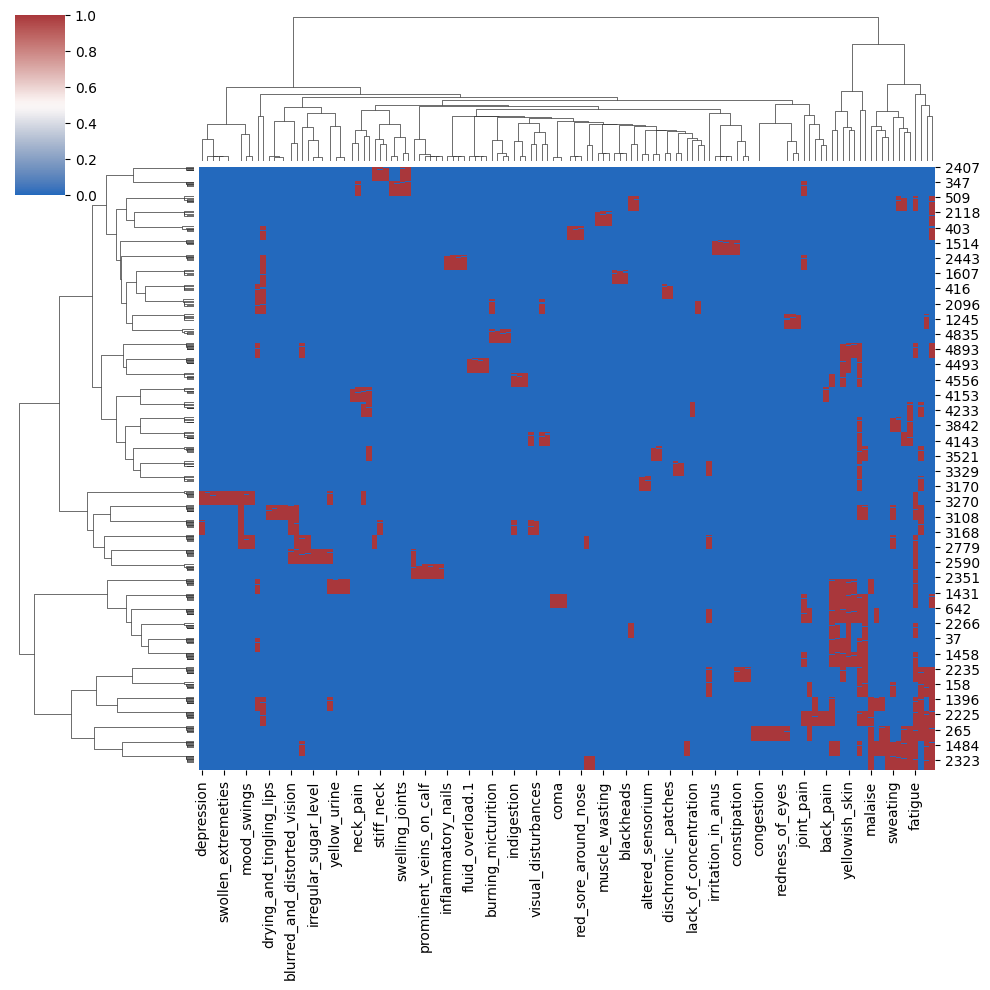

In [26]:
#Cluster Maps
sns.clustermap(df.drop(['prognosis'], axis=1), metric="euclidean", method="ward", cmap="vlag")

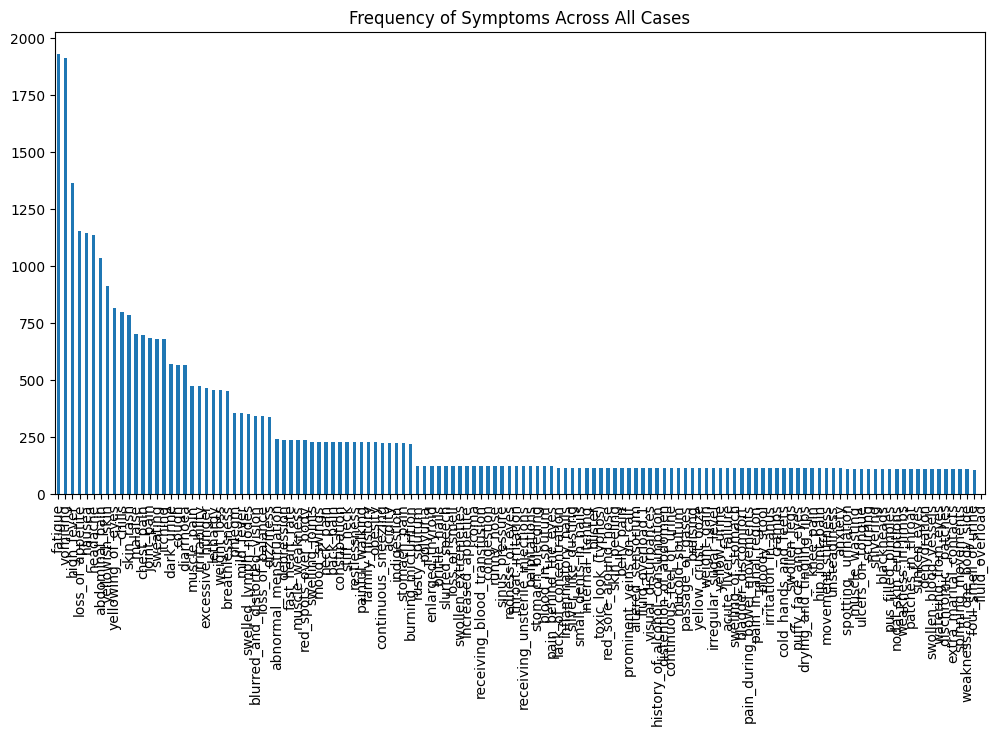

In [28]:
#bar Chart
symptom_counts = df.drop(['prognosis'], axis=1).sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
symptom_counts.plot(kind='bar')
plt.title("Frequency of Symptoms Across All Cases")
plt.xticks(rotation=90)
plt.show()

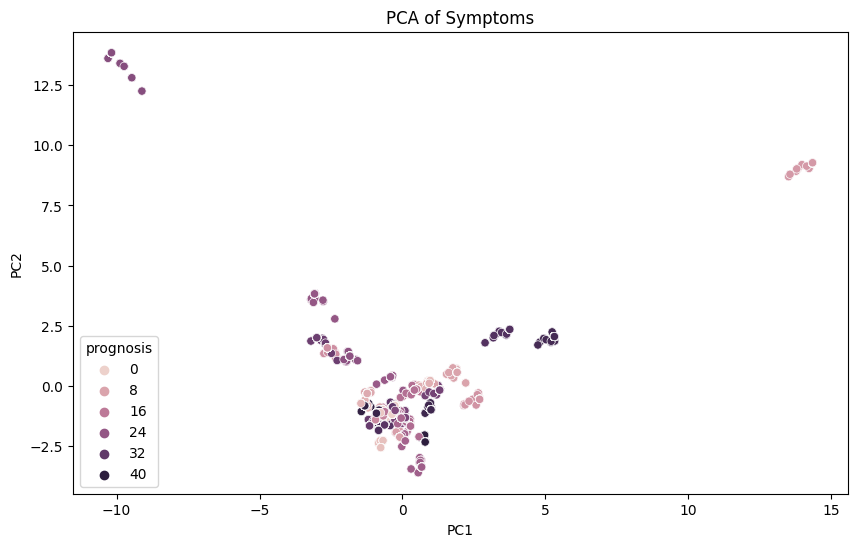

In [29]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df.drop(['prognosis'], axis=1)
scaled = StandardScaler().fit_transform(features)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['prognosis'] = df['prognosis']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='prognosis', data=pca_df)
plt.title('PCA of Symptoms')
plt.show()


In [30]:
'''Points closer together are similar in terms of symptoms.
Each color shows a different disease.
If diseases are clustered separately, your features are good for classification.
'''

'Points closer together are similar in terms of symptoms.\nEach color shows a different disease.\nIf diseases are clustered separately, your features are good for classification.\n'

In [9]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
df['prognosis']=le.fit_transform(df['prognosis'])

In [10]:
test = "/kaggle/input/disease-prediction-using-machine-learning/Testing.csv"
test_df = pd.read_csv(test)
test_df['prognosis']=le.fit_transform(test_df['prognosis'])

In [11]:
test_df.head(2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [12]:
X = df.drop(columns=['prognosis'])
y = df['prognosis']

In [13]:
import numpy as np

mask = ~np.isnan(X).any(axis=1)
X_clean = X[mask]
y_clean = y[mask]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2)


In [14]:
print(f"X train shape : {X_train.shape}")
print(f"Y_train shape: {y_train.shape}")

X train shape : (3936, 132)
Y_train shape: (3936,)


In [15]:
#define Cross Validation
def cv_scoring(estimator,X,y):
    return accuracy_score(y,estimator.predict(X))

models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, 
                             n_jobs = -1, 
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


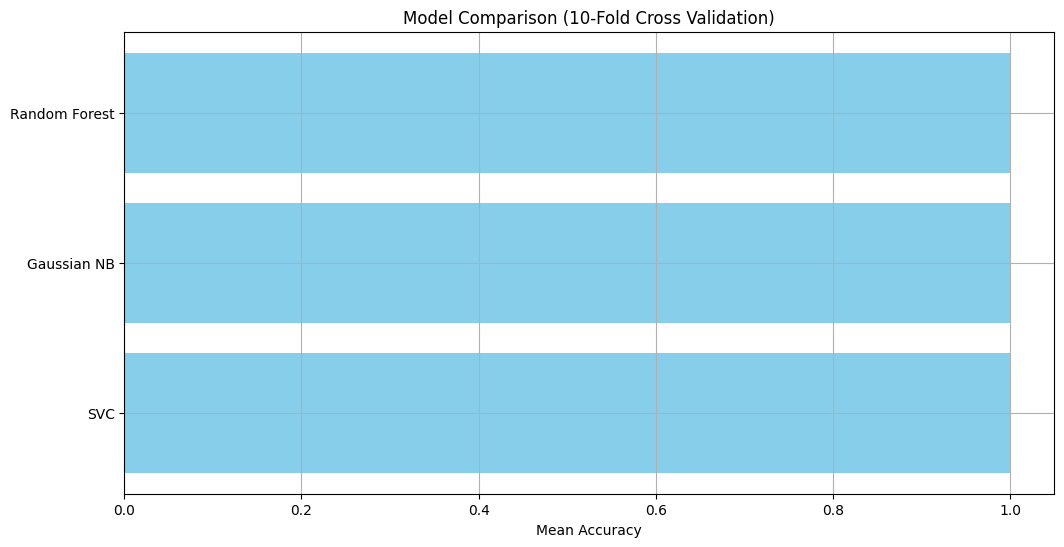

In [31]:
#Visualize CVscores
means = []
names = []

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring=cv_scoring)
    means.append(np.mean(scores))
    names.append(model_name)

plt.figure(figsize=(12, 6))
plt.barh(names, means, color='skyblue')
plt.xlabel("Mean Accuracy")
plt.title("Model Comparison (10-Fold Cross Validation)")
plt.grid(True)
plt.show()


In [32]:
X_train,y_train,X_test,y_test = train_test_split(X_clean,y_clean,test_size = 0.2)

accuracy score:100.0
accuuracy on test data:100.0


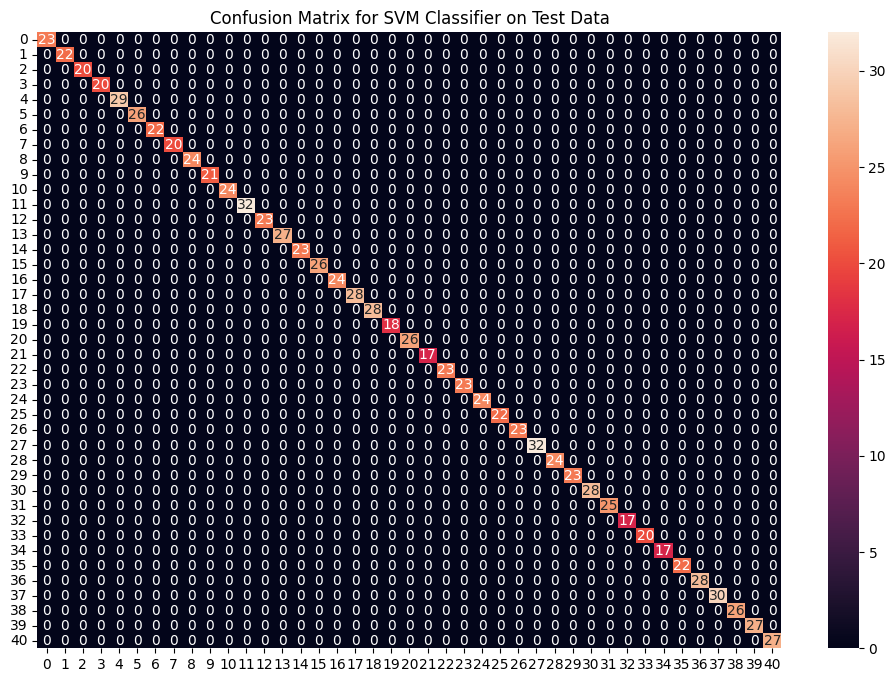

In [16]:
svm = SVC()
svm.fit(X_train,y_train)
preds = svm.predict(X_test)
print(f"accuracy score:{accuracy_score(y_train,svm.predict(X_train))*100}")
print(f"accuuracy on test data:{accuracy_score(y_test,preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

accuracy score:100.0
accuuracy on test data:100.0


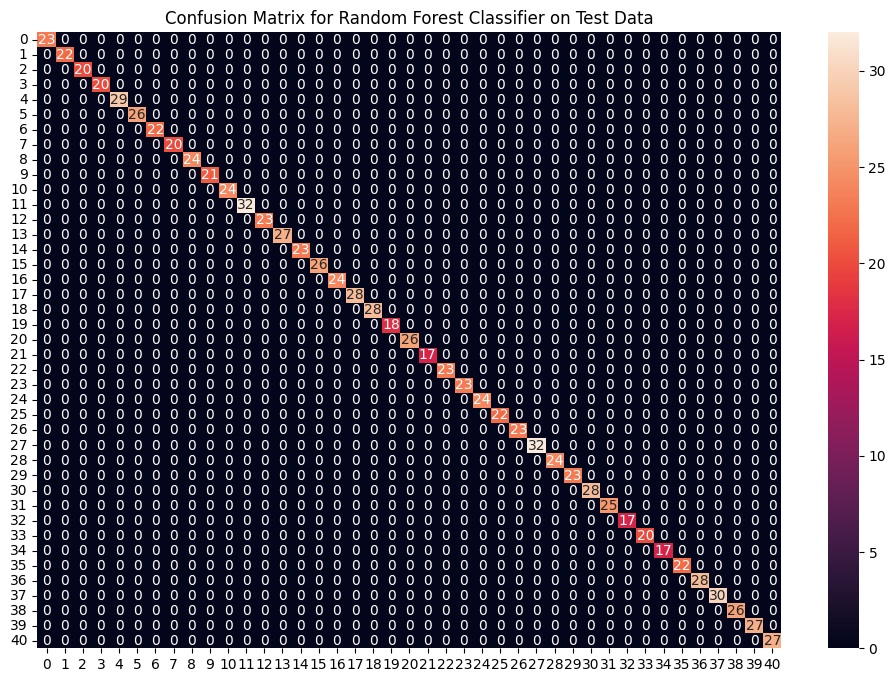

In [17]:
rf= RandomForestClassifier(random_state = 18)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(f"accuracy score:{accuracy_score(y_train,rf.predict(X_train))*100}")
print(f"accuuracy on test data:{accuracy_score(y_test,rf_pred)*100}")
rf_matrix = confusion_matrix(y_test,rf_pred)
plt.figure(figsize=(12,8))
sns.heatmap(rf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

accuracy score:100.0
accuuracy on test data:100.0


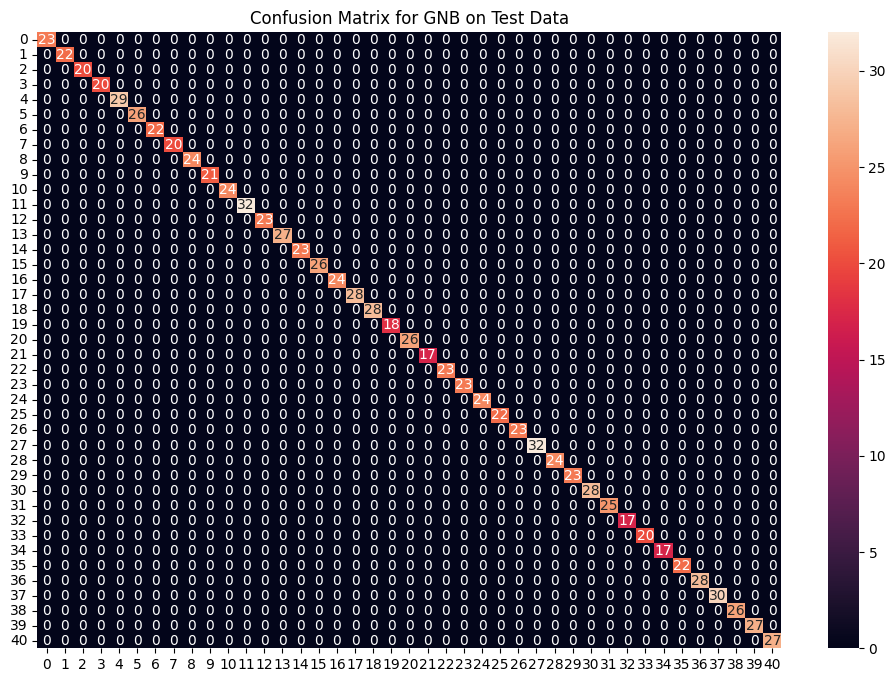

In [18]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
GNB_pred = GNB.predict(X_test)
print(f"accuracy score:{accuracy_score(y_train,GNB.predict(X_train))*100}")
print(f"accuuracy on test data:{accuracy_score(y_test,GNB_pred)*100}")
GNB_matrix = confusion_matrix(y_test,GNB_pred)
plt.figure(figsize=(12,8))
sns.heatmap(GNB_matrix, annot=True)
plt.title("Confusion Matrix for GNB on Test Data")
plt.show()

In [33]:
final_SVM_model = SVC()
final_NB = GaussianNB()
final_rf = RandomForestClassifier()
final_SVM_model.fit(X,y)
final_NB.fit(X,y)
final_rf.fit(X,y)
test_X = test_df.drop(columns =['prognosis'])
test_Y = test_df['prognosis']
svm_prediction = final_SVM_model.predict(test_X)
nb_prediction = final_NB.predict(test_X)
rf_prediction = final_rf.predict(test_X)


Accuracy on Test dataset by the combined model: 100.0


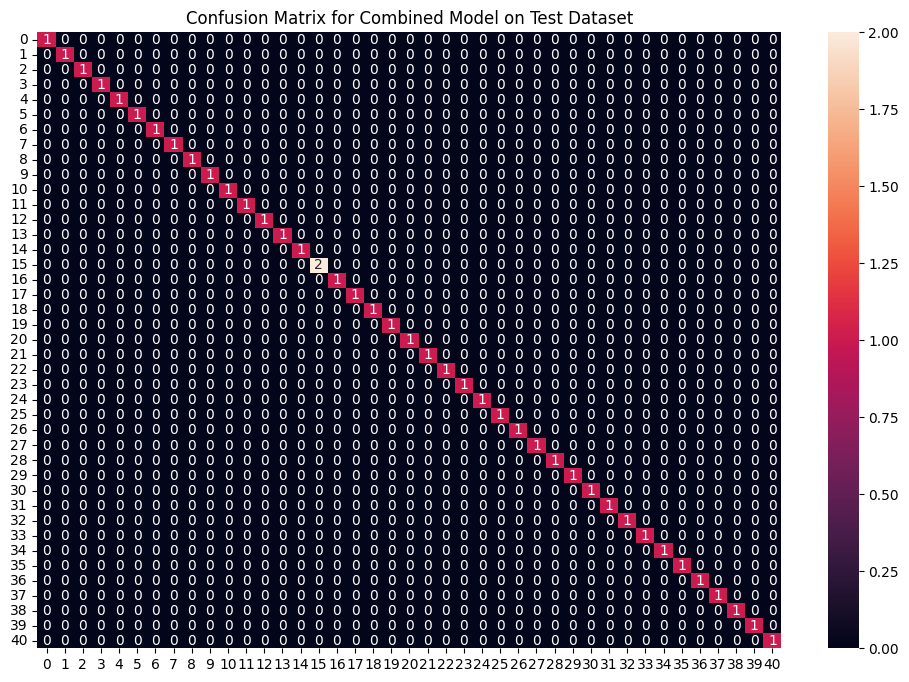

In [37]:
from scipy import stats

final_prediction = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_prediction, nb_prediction, rf_prediction)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_prediction)*100}")

conf_matrix = confusion_matrix(test_Y, final_prediction)
plt.figure(figsize=(12,8))

sns.heatmap(conf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

combined the predictions (For every test sample, you take the most common prediction (mode) among SVM, NB, and RF. This is a majority voting ensemble)
(Eg: If the predictions are [‘flu’, ‘flu’, ‘cold’], mode is ‘flu’.)

In [38]:
from sklearn.metrics import classification_report

print("Classification Report for Ensemble Model:")
print(classification_report(test_Y, final_prediction))

Classification Report for Ensemble Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      

In [39]:
import pickle

# Save ensemble predictions or models 
with open("final_rf_model.pkl", "wb") as f:
    pickle.dump(final_rf, f)

with open("final_NB_model.pkl", "wb") as f:
    pickle.dump(final_NB, f)
    
with open("final_SVM_model.pkl", "wb") as f:
    pickle.dump(final_SVM_model, f)

In [41]:
print("All models trained and evaluated.")
print("Ensemble model used majority voting from SVM, NB, and RF.")
print(f"Final Ensemble Accuracy on Test Set: {accuracy_score(test_Y, final_prediction)*100}%")


All models trained and evaluated.
Ensemble model used majority voting from SVM, NB, and RF.
Final Ensemble Accuracy on Test Set: 100.0%
